In [2]:
# test TS -- KAGGLE --- Source -- https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q

from sklearn import datasets

# iris = datasets.load_iris()
# print(type(iris))

import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

In [23]:
#from subprocess import check_output
#print(check_output(['ls', '../input']).decode('utf-8'))

train = pd.read_csv( "/home/dhankar/data_1/train.csv")
print(train.shape) # there are -== ROWS Count == 913000- (913000, 4) 


(913000, 4)


In [24]:
# change the Format of the DATE Column 
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
print(train.head(2))
print(train.tail(2))

        date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
             date  store  item  sales
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82


In [31]:


# per 1 store, 1 item
train_df = train[train['store']==1] ## FOOBAR - why store 1 ?
#train_df = train[train['store']==2]
train_df = train_df[train['item']==1]
# train_df = train_df.set_index('date')
train_df['year'] = train['date'].dt.year
train_df['month'] = train['date'].dt.month
train_df['day'] = train['date'].dt.dayofyear
train_df['weekday'] = train['date'].dt.weekday
print(train_df.head())
print(train_df.tail())


           date  store  item  sales  year  month  day  weekday
1826 2013-01-01      2     1     12  2013      1    1        1
1827 2013-01-02      2     1     16  2013      1    2        2
1828 2013-01-03      2     1     16  2013      1    3        3
1829 2013-01-04      2     1     20  2013      1    4        4
1830 2013-01-05      2     1     16  2013      1    5        5
           date  store  item  sales  year  month  day  weekday
3647 2017-12-27      2     1     19  2017     12  361        2
3648 2017-12-28      2     1     21  2017     12  362        3
3649 2017-12-29      2     1     18  2017     12  363        4
3650 2017-12-30      2     1     24  2017     12  364        5
3651 2017-12-31      2     1     31  2017     12  365        6


<AxesSubplot:xlabel='date', ylabel='sales'>

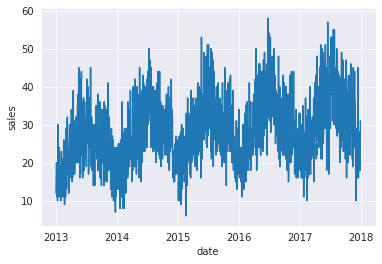

In [32]:
sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df)


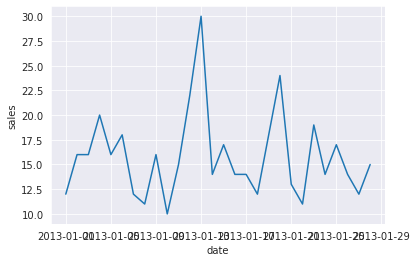

In [47]:
dt_sales_plt = sns.lineplot(x="date", y="sales",legend = 'brief' , data=train_df[:28])

#dt_sales_plt.xticks(rotation=45)
#dt_sales_plt.show()

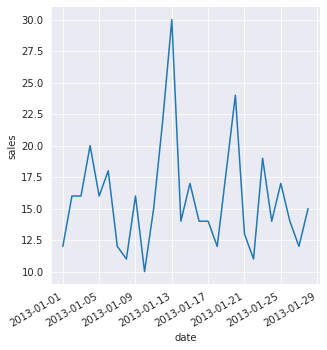

In [43]:
g = sns.relplot(x="date", y="sales", kind="line", data=train_df[:28])
g.figure.autofmt_xdate()
## FOOBAR - dates re-aligned and readable 

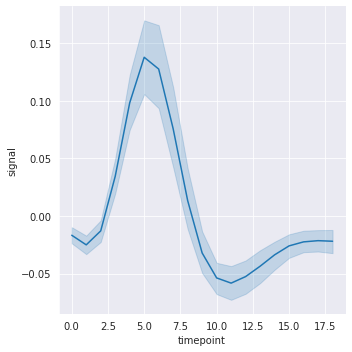

In [46]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri); ## this SEMICOLON -- will disable the 